# 导入所需的库

In [1]:
from pynq import Overlay
from pynq import Xlnk
import pynq.lib.dma
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 手动归一化（无法在PYNQ里运行torchvision.transform）

In [7]:
def my_transform(img):
    img = img.resize((28,28))
    im_data = np.array(img).astype(np.float32)
    im_data = im_data.transpose(2,0,1)
    for i in range(im_data.shape[0]):
        im_data[i,:,:] = (im_data[i,:,:] - np.mean(im_data[i,:,:])) / np.std(im_data[i,:,:])
    return im_data

# 载入Overlay，定义dma的输入输出通道

In [6]:
overlay = Overlay('cnn_robot_overlay/cnn_robot.bit')
xlnk = Xlnk()
x = xlnk.cma_array(shape=(3,28,28), dtype=np.float32)
y = xlnk.cma_array(shape=(6), dtype=np.float32)

input_ch = overlay.axi_dma_0.sendchannel
output_ch = overlay.axi_dma_0.recvchannel

# 载入图片，实际测试时应为摄像头拍到的图片

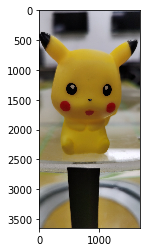

In [8]:
img = Image.open('pikaqiu.jpeg')
plt.imshow(img)
plt.show()
img_data = my_transform(img)
for i in range(3):
    for j in range(28):
        for k in range(28):
            x[i][j][k] = img_data[i][j][k]

# 得到输出

In [9]:
input_ch.transfer(x)
output_ch.transfer(y)
output_ch.wait()
print('y', y)
print('pred class: ', np.argmax(y))

y [ 3.0479598  -2.98709226 -4.74538374  1.07068181 -0.62395799 -0.64160472]
pred class:  0
